In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import vice

# from surp.src.analysis import plotting_utils as pluto
from surp.src.analysis.apogee_analysis import subgiants

In [3]:
import arya
arya.save_at("./figures")


Bad key test.antialiased in file /home/daniel/python/arya/style/journal.mplstyle, line 14 ('test.antialiased:   False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution


In [9]:
def hex_to_rgb(h):
    return tuple(int(h[i:i+2], 16) for i in (1, 3, 5))

In [16]:
def to_lch(rgb):
    if type(rgb) is str:
        rgb = hex_to_rgb(rgb)
    return cspace_converter("sRGB255", "JCh")(rgb)

In [17]:
def to_hex(lch):
    r, g, b = to_rgb(lch)
    if any([round(x)>255 for x in [r,g,b]]):
        print("warning, out of range")
        print((r, g, b))
        s = round(max(r, g, b))/255
        r /= s
        g /= s
        b /= s
    return f"#{round(r):02x}{round(g):02x}{round(b):02x}"

In [18]:
def to_rgb(lch):
    a = lch
    a[2] = a[2] % 360
    return cspace_converter("JCh", "sRGB255")(lch)

In [79]:
cmap = ['#271d50', '#291d51', '#2a1d51', '#2c1e52', '#2d1e52', '#2f1e53', '#301e53', '#321f54', '#331f54', '#351f55', '#361f55', '#371f56', '#392056', '#3a2057', '#3c2057', '#3d2058', '#3f2158', '#402159', '#412159', '#43215a', '#44215a', '#45225b', '#47225b', '#48225c', '#4a225c', '#4b235d', '#4c235d', '#4e235d', '#4f235e', '#50235e', '#52245f', '#53245f', '#542460', '#562460', '#572460', '#582561', '#5a2561', '#5b2561', '#5c2562', '#5e2662', '#5f2663', '#602663', '#622663', '#632764', '#642764', '#662764', '#672765', '#682865', '#6a2865', '#6b2866', '#6c2866', '#6e2866', '#6f2966', '#702967', '#722967', '#732a67', '#742a68', '#752a68', '#772a68', '#782b68', '#792b69', '#7b2b69', '#7c2b69', '#7d2c69', '#7e2c69', '#802c6a', '#812d6a', '#822d6a', '#842d6a', '#852d6a', '#862e6b', '#872e6b', '#892e6b', '#8a2f6b', '#8b2f6b', '#8d2f6b', '#8e306c', '#8f306c', '#90306c', '#92316c', '#93316c', '#94316c', '#96326c', '#97326c', '#98326c', '#99336c', '#9b336d', '#9c336d', '#9d346d', '#9e346d', '#a0346d', '#a1356d', '#a2356d', '#a3366d', '#a5366d', '#a6366d', '#a7376d', '#a8376d', '#aa386d', '#ab386d', '#ac386d', '#ad396d', '#ae396c', '#b03a6c', '#b13a6c', '#b23b6c', '#b33b6c', '#b53c6c', '#b63c6c', '#b73c6c', '#b83d6c', '#b93d6c', '#bb3e6b', '#bc3e6b', '#bd3f6b', '#be3f6b', '#c0406b', '#c1406b', '#c2416a', '#c3416a', '#c4426a', '#c5426a', '#c74369', '#c84369', '#c94469', '#ca4568', '#cb4667', '#cc4765', '#cc4864', '#cd4963', '#ce4a62', '#cf4c61', '#cf4d60', '#d04e5f', '#d14f5e', '#d1505d', '#d2515c', '#d3525b', '#d3535b', '#d4545a', '#d55659', '#d55758', '#d65857', '#d65957', '#d75a56', '#d75b55', '#d85c55', '#d85e54', '#d95f53', '#d96053', '#da6152', '#da6252', '#db6351', '#db6551', '#db6650', '#dc6750', '#dc684f', '#dd694f', '#dd6a4e', '#dd6b4e', '#de6d4e', '#de6e4d', '#de6f4d', '#df704d', '#df714c', '#df724c', '#e0744c', '#e0754c', '#e0764b', '#e0774b', '#e1784b', '#e1794b', '#e17b4b', '#e17c4b', '#e27d4a', '#e27e4a', '#e27f4a', '#e2804a', '#e2824a', '#e3834a', '#e3844a', '#e3854a', '#e3864a', '#e3874a', '#e3894a', '#e38a4b', '#e38b4b', '#e48c4b', '#e48d4b', '#e48e4b', '#e4904b', '#e4914c', '#e4924c', '#e4934c', '#e4944c', '#e4954d', '#e4964d', '#e4984d', '#e4994d', '#e49a4e', '#e49b4e', '#e49c4f', '#e49d4f', '#e49f4f', '#e4a050', '#e4a150', '#e4a251', '#e4a351', '#e4a452', '#e4a652', '#e3a753', '#e3a853', '#e3a954', '#e3aa54', '#e3ab55', '#e3ad56', '#e3ae56', '#e2af57', '#e2b057', '#e2b158', '#e2b259', '#e2b459', '#e1b55a', '#e1b65b', '#e1b75c', '#e1b85c', '#e0b95d', '#e0bb5e', '#e0bc5f', '#dfbd5f', '#dfbe60', '#dfbf61', '#dec062', '#dec163', '#dec364', '#ddc465', '#ddc565', '#ddc666', '#dcc767', '#dcc968', '#dbca69', '#dbcb6a', '#dbcc6b', '#dacd6c', '#dace6d', '#d9cf6e', '#d9d16f', '#d8d270', '#d7d371', '#d7d472', '#d6d573', '#d6d674', '#d5d875', '#d5d977', '#d4da78', '#d3db79']


In [80]:
rgb = [hex_to_rgb(h) for h in arya.style.COLORS]
rgb2 = [hex_to_rgb(h) for h in cmap]
s = np.arange(10, 0, -1)

lab = to_lch(rgb)
lab2 = to_lch(rgb2)
plasma = to_lch([np.array(c)*256 for c in mpl.colormaps["plasma"].colors])


Text(0, 0.5, 'Chroma')

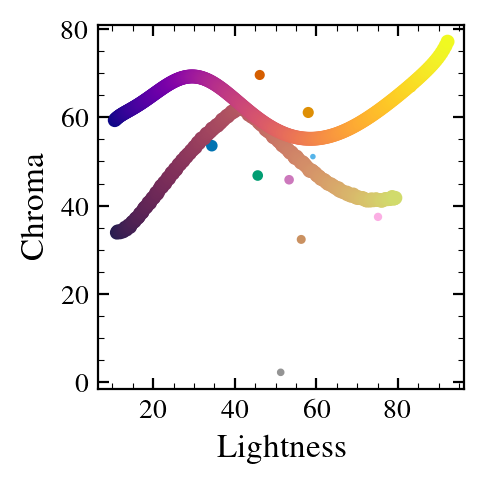

In [81]:
plt.scatter(lab[:, 0], lab[:, 1], c=arya.style.COLORS, s=s)
plt.scatter(lab2[:, 0], lab2[:, 1], c=[np.array(hex_to_rgb(h))/256 for h in arya.style.cmap])
plt.scatter(plasma[:, 0], plasma[:, 1], c=mpl.colormaps["plasma"].colors)

plt.xlabel("Lightness")
plt.ylabel("Chroma")

[]

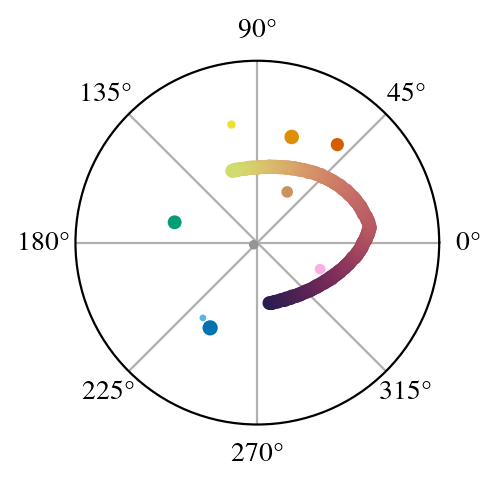

In [82]:
fig, ax = plt.subplots(subplot_kw={'projection':'polar'})

ax.scatter(lab[:, 2]/180*np.pi, lab[:, 1], c=arya.style.COLORS, s=2*s, zorder=2)
ax.scatter(lab2[:, 2]/180*np.pi, lab2[:, 1], c=arya.style.cmap, zorder=2)

ax.set_rmax(100)
ax.set_rlabel_position(0)
ax.set_rticks([])


one file saved at ./figures/subgiants_mgh.pdf


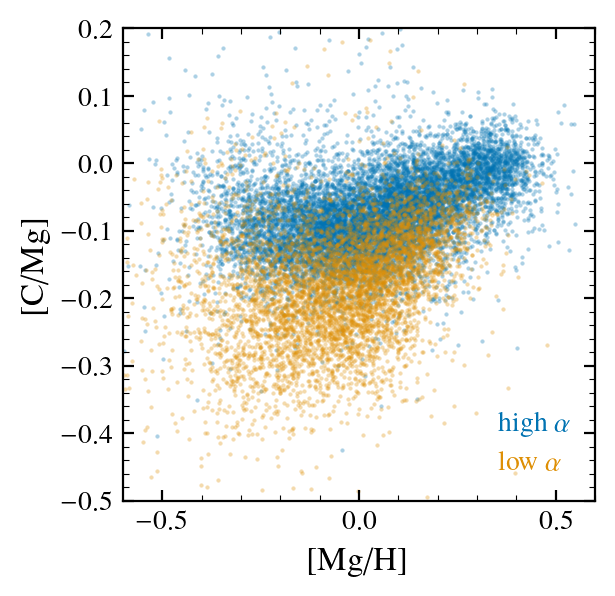

In [4]:
ha = subgiants["high_alpha"]

df = subgiants[~ha]

s = arya.Scatter(df["MG_H"], df["C_MG"], size=0.3, alpha=0.3)
s.label = "high $\\alpha$"

sp = s.subplot

df = subgiants[ha]
s1 = arya.Scatter(df["MG_H"], df["C_MG"], size=0.3, subplot=sp, alpha=0.3)
s1.label = "low $\\alpha$"


arya.Legend(sp)
sp.legend.ms = 2
cs = []
for c in sp.legend.colors:
    c1 = c
    c1[3] = 1
    cs.append(c1)
    
sp.legend.colors = cs
sp.legend.color_labels()
sp.legend.hide_handles()


sp.x.lim = (-0.6, 0.6)
sp.y.lim = (-0.5, 0.2)
sp.x.label = "[Mg/H]"
sp.y.label = "[C/Mg]"

sp.save("subgiants_mgh.pdf")

one file saved at ./figures/subgiants_mgfe.pdf


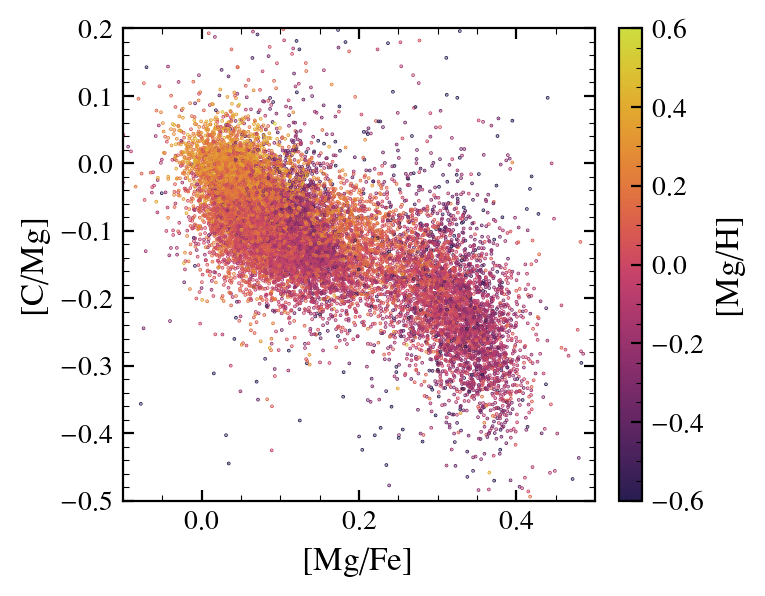

In [5]:
hanha = subgiants["high_alpha"]

df = subgiants
s = arya.Scatter(df["MG_FE"], df["C_MG"], s=0.1, alpha=1, c=df["MG_H"])
s.clim = (-0.6, 0.6)
s.label = "high $\\alpha$"

sp = s.subplot
cb = arya.Colorbar(s)
cb.ax.label = "[Mg/H]"

sp.x.lim = (-0.1, 0.5)
sp.y.lim = (-0.5, 0.2)
sp.x.label = "[Mg/Fe]"
sp.y.label = "[C/Mg]"

sp.save("subgiants_mgfe.pdf")


In [12]:

Z_max = 0.04
Z_min = 0.0001
logZ_min = np.log10(Z_min/0.014)
logZ_max = np.log10(Z_max/0.014)

norm = mpl.colors.Normalize(logZ_min, logZ_max)
cmap = arya.style.get_cmap()
mpp = mpl.cm.ScalarMappable(norm, cmap)
ma = mpp.to_rgba

AGB_MODELS = ["cristallo11", "karakas10", "ventura13", "karakas16"]
AGB_LABELS = ["C11+C15", "K10", "V13", "KL16+K18"]

# plt.rc('xtick.minor', visible=False)

def plot_c_table(study = "cristallo11", sp=None, label=None):

    y1, m1, z1 = vice.yields.agb.grid('c', study=study)
    N = len(z1)

    for i in range(N):
        y = np.array(y1)[:,i]
        z = z1[i]
        logz = np.log10(z) - np.log10(0.014)

        arya.Scatter(m1, y, label=f"Z = {z}", color=ma(logz), subplot=sp, zorder=i)
        arya.Line(m1, y, color=ma(logz), subplot=sp, zorder=i)

    plt.text(0.9, 0.9, label, horizontalalignment='right',
                   verticalalignment='top', transform=sp.mpl_ax.transAxes)
        # ax.set_xticks(np.arange(1, 8))
    
    # ax.axhline(0, color="k", ls="--", zorder=-1)



In [6]:
import arya

In [8]:
mpl.style.use("/home/daniel/python/arya/style/journal.mplstyle")

one file saved at ./figures/agb_yields.pdf


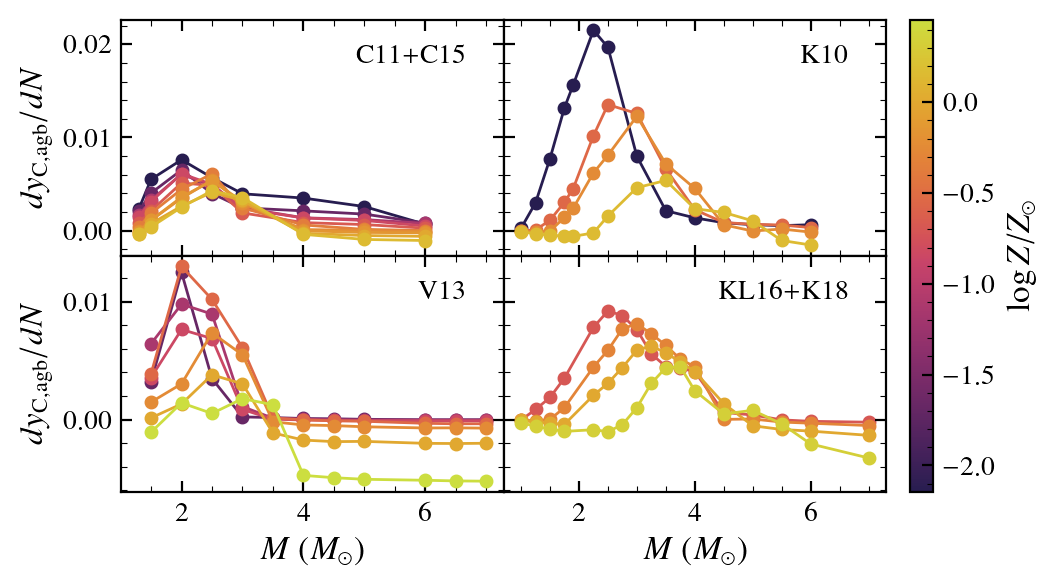

In [13]:
jp = arya.JoinPlot(2, 2, size=(3.822, 2.362))

for i in range(4):
    sp = jp.children[i//2][i%2]
    sp.x.label = r"$M\ (M_{\odot})$"
    sp.y.label = r"$dy_{\rm C, agb}/dN$"
    study = AGB_MODELS[i]
    label = AGB_LABELS[i]
    plot_c_table(study=study, sp=sp, label=label)
    
c = arya.Colorbar(subplot=jp, mappable = mpp, row=1, col=2, width=arya.Length(2.362*0.05))
c.ax.label = "$\log Z/Z_{\odot}$"

sp.save("agb_yields.pdf")

one file saved at ./figures/y_agb_vs_t.pdf


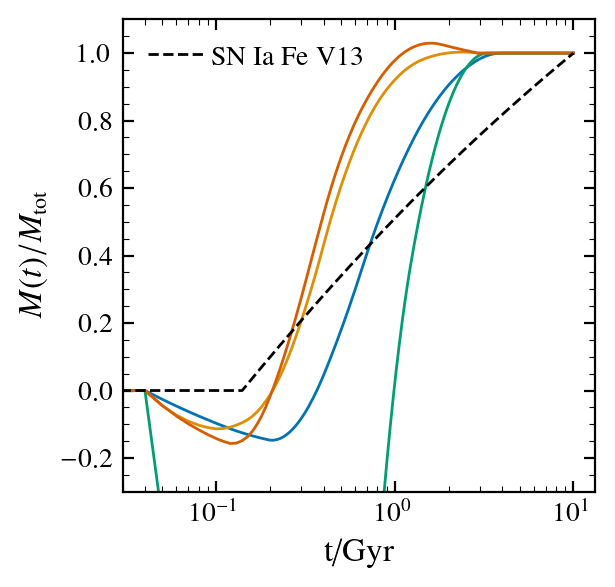

In [97]:
AGB_MODELS = ["cristallo11", "karakas10", "ventura13", "karakas16"]
AGB_LABELS = ["C11+C15", "K10", "V13", "KL16+K18"]
vice.yields.ccsne.settings["c"] = 0
vice.yields.sneia.settings["c"] = 0
vice.yields.ccsne.settings["fe"] = 0

sp = arya.Subplot()

for i in range(4):
    model = AGB_MODELS[i]
    vice.yields.agb.settings["c"] = model
    m_c, times = vice.single_stellar_population("c", Z=0.014 * 10**0)
    m_c = [c for c in m_c]
    arya.Line(times, np.array(m_c)/m_c[-1], subplot=sp)

m_fe, times = vice.single_stellar_population("fe", Z=0.014)
m_fe = [fe for fe in m_fe]
plt.plot(times, np.array(m_fe)/m_fe[-1], label="SN Ia Fe V13",
         linestyle="--", color="k")


plt.xlabel("t/Gyr")
plt.ylabel(r"$M(t)/M_{\rm tot}$")
plt.xscale("log")
plt.legend()
plt.ylim(-0.3, 1.1)
plt.xlim(0.03, 13.2)
sp.save("y_agb_vs_t.pdf")

one file saved at ./figures/y_agb_vs_z.pdf


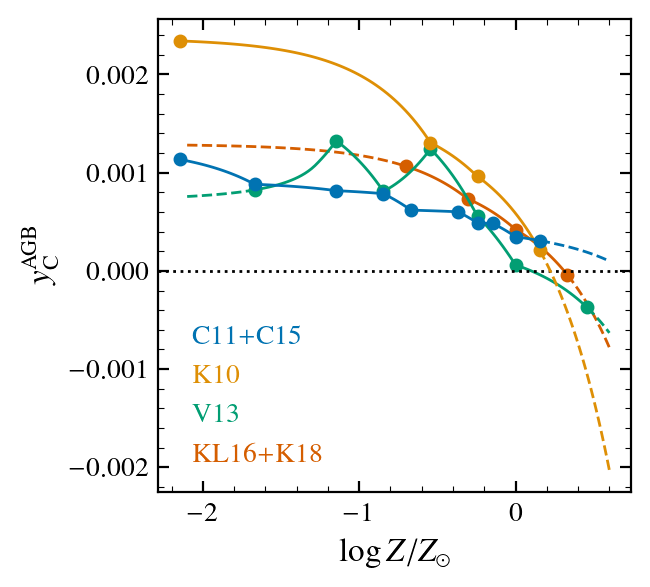

In [21]:
AGB_MODELS = ["cristallo11", "karakas10", "ventura13", "karakas16"]
AGB_LABELS = ["C11+C15", "K10", "V13", "KL16+K18"]


sp = arya.Subplot()

for i in range(len(AGB_MODELS)):
    model = AGB_MODELS[i]

    vice.yields.agb.settings["c"] = model
    vice.yields.ccsne.settings["c"] = 0
    Zs = 0.014*10**np.linspace(-2, 1, 100)
    
    # plots importaint points
    if type(model) == str:
        y1, m1, z1 = vice.yields.agb.grid('c', study=model)
        Zs = np.array(z1)
    mass_yields = []
    for Z in Zs:
        m_c, times = vice.single_stellar_population("c", Z=Z)
        mass_yields.append(m_c[-1])
        
    y_c_agb = np.array(mass_yields)/1e6 
    y_o_cc = 0.015
    arya.Scatter(np.log10(Zs/0.014), y_c_agb, subplot=sp, zorder=4-i)
    
    
    MoverH_min = np.log10(min(Zs)/0.014)
    MoverH_max = np.log10(max(Zs)/0.014)
    
    Zs = 0.014*10**np.linspace(MoverH_min, MoverH_max, 100)
    mass_yields = []
    for Z in Zs:
        m_c, times = vice.single_stellar_population("c", Z=Z)
        mass_yields.append(m_c[-1])
        
    l = arya.Line(np.log10(Zs/0.014), (np.array(mass_yields)/1e6 ), 
                  label=AGB_LABELS[i], subplot=sp, zorder=4-i)
    l.label = AGB_LABELS[i]

    Zs = 0.014*10**np.linspace(-2.1, MoverH_min, 100)
    mass_yields = []
    for Z in Zs:
        m_c, times = vice.single_stellar_population("c", Z=Z)
        mass_yields.append(m_c[-1])
    arya.Line(np.log10(Zs/0.014), (np.array(mass_yields)/1e6 ), linestyle="--", 
              color=l.color, subplot=sp, zorder=4-i)

    Zs = 0.014*10**np.linspace(MoverH_max, 0.6, 100)
    mass_yields = []
    for Z in Zs:
        m_c, times = vice.single_stellar_population("c", Z=Z)
        mass_yields.append(m_c[-1])
    arya.Line(np.log10(Zs/0.014), (np.array(mass_yields)/1e6 ), linestyle="--", 
              color=l.color, subplot=sp, zorder=4-i)

plt.axhline(0, color="k", ls=":")
plt.xlabel(r"$\log Z/Z_\odot$")
plt.ylabel(r"$y_\text{C}^\text{AGB}$")

leg = arya.Legend(sp, handlelength=0)
leg.hide_handles()
leg.color_labels()

sp.save("y_agb_vs_z.pdf")